<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working in IBM Cloud Watson Studio, please replace the command for installing nbformat from `!pip install nbformat==4.2.0` to simply `!pip install nbformat`


In [1]:
!pip install yfinance 
!pip install pandas beautifulsoup4
!pip install matplotlib
!pip install plotly
!pip3 install plotly
!pip list | grep plotly
!pip install pandas==1.3.3
import yfinance as yf
import pandas as pd
import datetime
from urllib.request import Request, urlopen
import requests
import plotly.graph_objs as go
from bs4 import BeautifulSoup
from IPython.display import display
from datetime import datetime
from plotly.subplots import make_subplots
!pip install pandas
!pip install html5lib
!pip install lxml
!pip install pandas lxml html5lib beautifulsoup4


plotly                    5.20.0
  Using cached pandas-1.3.3.tar.gz (4.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      Traceback (most recent call last):
        File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 353, in <module>
          main()
        File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [2]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [51]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    # Convert 'Date' columns to datetime
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])

    # Start plotting
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Plot the stock data
    ax1.plot(stock_data['Date'], stock_data['Close'], color='g', label='Close Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Close Price', color='g')
    ax1.tick_params('y', colors='g')

    # Create a second y-axis to plot the revenue data
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='r', label='Revenue')
    ax2.set_ylabel('Revenue', color='r')
    ax2.tick_params('y', colors='r')

    # Title and legend
    plt.title(f'{stock_name} Stock Close Prices & Revenue')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Show the graph
    plt.show()



## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [33]:
Tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [34]:
tesla_hist = Tesla.history(period="max")
tesla_data = pd.DataFrame(tesla_hist)
print(tesla_data)

                                 Open        High         Low       Close  \
Date                                                                        
2010-06-29 00:00:00-04:00    1.266667    1.666667    1.169333    1.592667   
2010-06-30 00:00:00-04:00    1.719333    2.028000    1.553333    1.588667   
2010-07-01 00:00:00-04:00    1.666667    1.728000    1.351333    1.464000   
2010-07-02 00:00:00-04:00    1.533333    1.540000    1.247333    1.280000   
2010-07-06 00:00:00-04:00    1.333333    1.333333    1.055333    1.074000   
...                               ...         ...         ...         ...   
2024-03-28 00:00:00-04:00  177.449997  179.570007  175.300003  175.789993   
2024-04-01 00:00:00-04:00  176.169998  176.750000  170.210007  175.220001   
2024-04-02 00:00:00-04:00  164.750000  167.690002  163.429993  166.630005   
2024-04-03 00:00:00-04:00  164.020004  168.820007  163.279999  168.380005   
2024-04-04 00:00:00-04:00  164.020004  177.190002  168.009995  175.929993   

=
**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [35]:
stock_data = yf.download("TSLA", start="2020-01-01", end="2021-09-30", progress=False)
revenue_data = yf.download("TSLA", start="2020-01-01", end="2021-09-30", progress=False)
stock_data.reset_index(inplace=True)
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [36]:
url ='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data = requests.get(url).text
#print(html_data)

Parse the html data using `beautiful_soup`.


In [37]:
soup = BeautifulSoup(html_data, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [38]:
tesla_revenue= pd.DataFrame(columns=["Date", "Revenue"]), 
tables = pd.read_html(html_data)
dates = pd.Series([])
revenues = pd.Series([])                
for table in tables[0:2]:
    last_index= len(table)-1
    dates = table.iloc[0: last_index, 0]
    revenues = table.iloc[0: last_index, 1]

#dates_col= pd.to_datetime(dates)
tesla_revenue = pd.DataFrame({"Date": dates, "Revenue": revenues})
print(tesla_revenue.to_string(index=False))

      Date Revenue
2022-09-30 $21,454
2022-06-30 $16,934
2022-03-31 $18,756
2021-12-31 $17,719
2021-09-30 $13,757
2021-06-30 $11,958
2021-03-31 $10,389
2020-12-31 $10,744
2020-09-30  $8,771
2020-06-30  $6,036
2020-03-31  $5,985
2019-12-31  $7,384
2019-09-30  $6,303
2019-06-30  $6,350
2019-03-31  $4,541
2018-12-31  $7,226
2018-09-30  $6,824
2018-06-30  $4,002
2018-03-31  $3,409
2017-12-31  $3,288
2017-09-30  $2,985
2017-06-30  $2,790
2017-03-31  $2,696
2016-12-31  $2,285
2016-09-30  $2,298
2016-06-30  $1,270
2016-03-31  $1,147
2015-12-31  $1,214
2015-09-30    $937
2015-06-30    $955
2015-03-31    $940
2014-12-31    $957
2014-09-30    $852
2014-06-30    $769
2014-03-31    $621
2013-12-31    $615
2013-09-30    $431
2013-06-30    $405
2013-03-31    $562
2012-12-31    $306
2012-09-30     $50
2012-06-30     $27
2012-03-31     $30
2011-12-31     $39
2011-09-30     $58
2011-06-30     $58
2011-03-31     $49
2010-12-31     $36
2010-09-30     $31
2010-06-30     $28
2010-03-31     $21
2009-12-31  

Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [39]:
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(r",|\$","")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [40]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [41]:
last_5_rows = tesla_revenue.tail(5)
print(last_5_rows)

          Date Revenue
47  2010-12-31     $36
48  2010-09-30     $31
49  2010-06-30     $28
50  2010-03-31     $21
52  2009-09-30     $46


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [42]:
GameStop = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [43]:
gme_hist = GameStop.history(period="max")
gme_data = pd.DataFrame(gme_hist)
print(gme_data)

                                Open       High        Low      Close  \
Date                                                                    
2002-02-13 00:00:00-05:00   1.620129   1.693350   1.603296   1.691667   
2002-02-14 00:00:00-05:00   1.712707   1.716074   1.670626   1.683250   
2002-02-15 00:00:00-05:00   1.683250   1.687458   1.658002   1.674834   
2002-02-19 00:00:00-05:00   1.666418   1.666418   1.578047   1.607504   
2002-02-20 00:00:00-05:00   1.615921   1.662210   1.603296   1.662210   
...                              ...        ...        ...        ...   
2024-03-28 00:00:00-04:00  13.190000  13.190000  12.470000  12.520000   
2024-04-01 00:00:00-04:00  12.630000  12.670000  11.550000  11.990000   
2024-04-02 00:00:00-04:00  11.840000  11.990000  11.260000  11.280000   
2024-04-03 00:00:00-04:00  11.220000  11.500000  10.900000  11.380000   
2024-04-04 00:00:00-04:00  11.500000  11.820000  11.379900  11.815000   

                             Volume  Dividends  St

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [44]:
stock_data = yf.download("GME", start="2020-01-01", end="2021-09-30", progress=False)
revenue_data = yf.download("GME", start="2020-01-01", end="2021-09-30", progress=False)
stock_data.reset_index(inplace=True)
gme_data.reset_index(inplace=True)
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [45]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data = requests.get(url).text
#print(html_data)

Parse the html data using `beautiful_soup`.


In [46]:
soup = BeautifulSoup(html_data, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [47]:
gme_revenue= pd.DataFrame(columns=["Date", "Revenue"]), 
tables = pd.read_html(html_data)
dates = pd.Series([])
revenues = pd.Series([])                
for table in tables[0:1]:
    last_index= len(table)-1
    dates = table.iloc[0: last_index, 0]
    revenues = table.iloc[0: last_index, 1]

gme_revenue = pd.DataFrame({"Date": dates, "Revenue": revenues})
print(gme_revenue.to_string(index=False))

 Date Revenue
 2020  $6,466
 2019  $8,285
 2018  $8,547
 2017  $7,965
 2016  $9,364
 2015  $9,296
 2014  $9,040
 2013  $8,887
 2012  $9,551
 2011  $9,474
 2010  $9,078
 2009  $8,806
 2008  $7,094
 2007  $5,319
 2006  $3,092


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [48]:
last_5_rows = gme_revenue.tail(5)
print(last_5_rows)

    Date Revenue
10  2010  $9,078
11  2009  $8,806
12  2008  $7,094
13  2007  $5,319
14  2006  $3,092


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


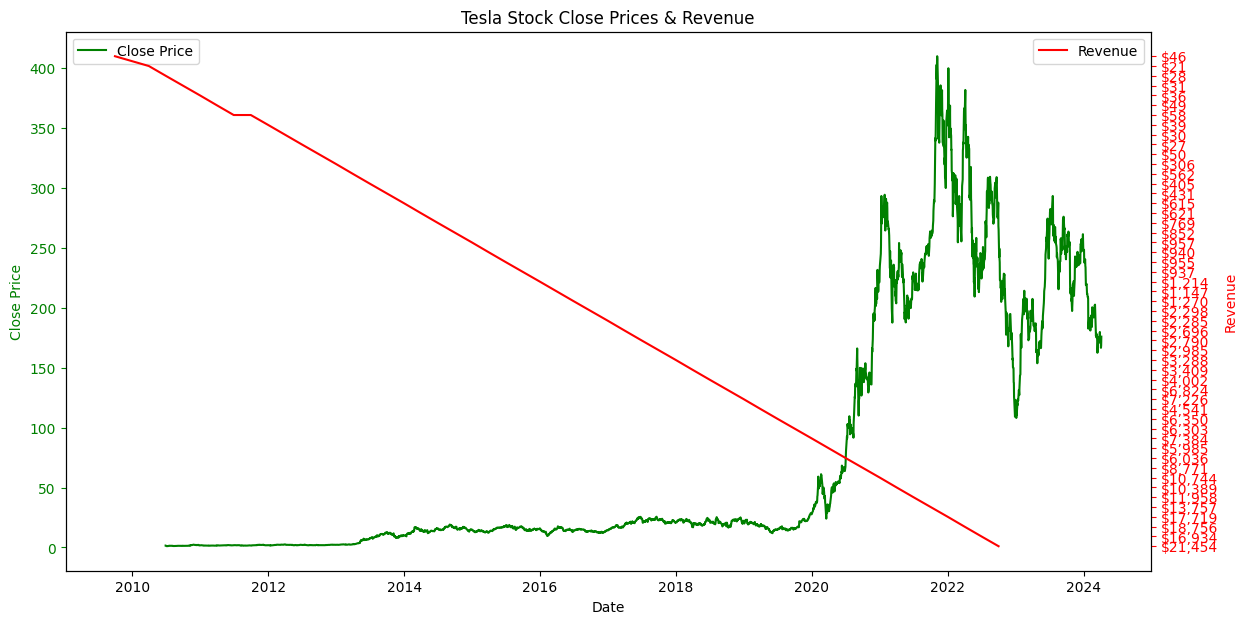

In [52]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


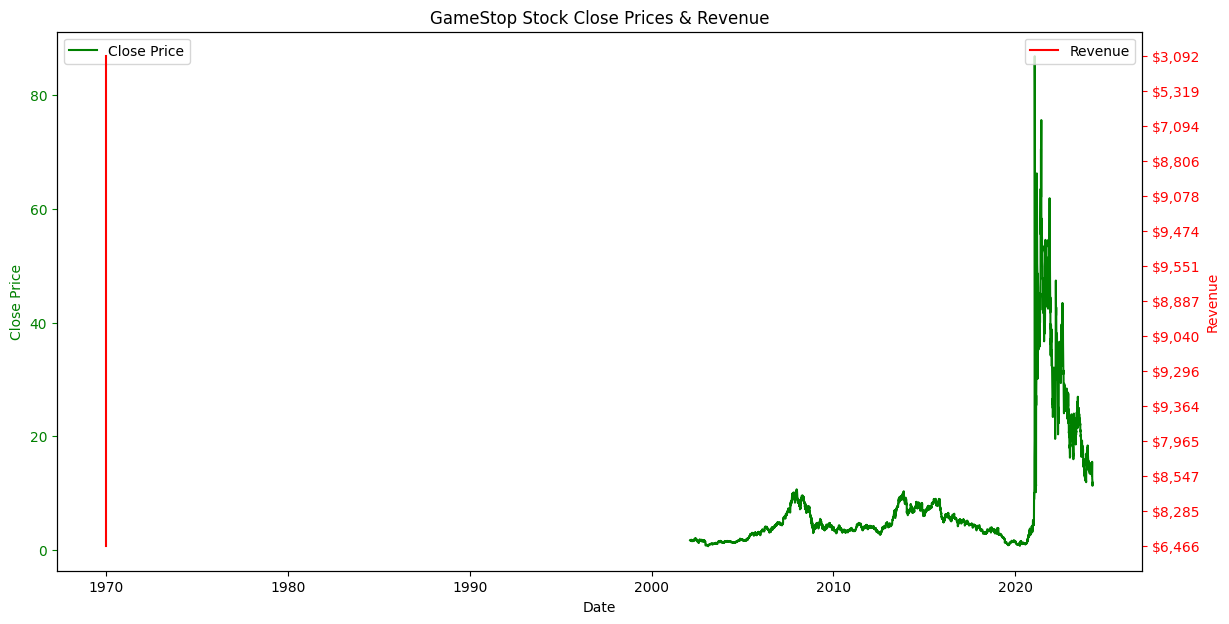

In [53]:
make_graph(gme_data, gme_revenue, 'GameStop')

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
